## Gathering Project Data

In [2]:
# Importing all needed libraries 
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import zipfile
import os
import requests 
import glob 
import tweepy
import json
from bs4 import BeautifulSoup

In [3]:
# Reading and saving csv file in this case 'twitter-archive-enhanced.csv'
ratedogs_df=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
ratedogs_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Downloading and saving file programmatically using the Requests in this case 'image_predictions.tsv',then save it in a dataframe.
predictions_df=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(predictions_df.content)
predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')

In [6]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


 **Obtaining user access tokens using 3-legged OAuth** <br>
The following resources used to understand how to use this authentication method<br>
 http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html<br>
 https://developer.twitter.com/en/docs/authentication/oauth-1-0a/obtaining-user-access-tokens
 https://www.digitalocean.com/community/tutorials/how-to-create-a-twitter-app-with-python

In [7]:
consumer_key = '********'
consumer_secret = '*******'
access_token = '*******'
access_secret = '********'
#Creating an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit = True)

In [8]:
# Writing each tweet's into a JSON file
with open('tweet_json.txt','w', encoding='utf-8') as file:
    for tweet_id in ratedogs_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue

In [9]:
# Created a list to save each tweet in a line
tweet_list = []

with open('tweet_json.txt', 'r') as tweet_file:
    for line in tweet_file:
        current_line = json.loads(line)
# Add to list tweet_list
        tweet_list.append({'tweet_id': current_line['id'],'retweet_count': current_line['retweet_count'],
                          'favorite_count': current_line['favorite_count'],'display_text_range': current_line['display_text_range']
                          })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweets_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])
tweets_df.head(5)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7469,35383,"[0, 85]"
1,892177421306343426,5545,30620,"[0, 138]"
2,891815181378084864,3671,23034,"[0, 121]"
3,891689557279858688,7645,38667,"[0, 79]"
4,891327558926688256,8243,36953,"[0, 138]"


In [123]:
# I decided to convert the file to csv for use convenience.
tweets_df.to_csv('tweets.csv')

## Assessing Project Data  

In [124]:
ratedogs_df.sample(405)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
111,871032628920680449,NaN,NaN,2017-06-03 15:55:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Boomer. He's doing an advanced water t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871032628...,13,10,Boomer,None,None,None,None
1785,677644091929329666,NaN,NaN,2015-12-18 00:18:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677644091...,11,10,a,None,None,None,None
2079,670826280409919488,NaN,NaN,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Scary dog here. Too many legs. Extra tail. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,None,None,None,None,None
372,828381636999917570,NaN,NaN,2017-02-05 23:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Doobert. He's a deaf doggo. Didn't stop h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828381636...,14,10,Doobert,doggo,None,None,None
1968,673320132811366400,NaN,NaN,2015-12-06 01:56:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103,670676092097810432,NaN,NaN,2015-11-28 18:50:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloo. He's a Westminster Cîroc. Doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670676092...,8,10,Bloo,None,None,None,None
424,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harlso. He has a really good idea but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889...,13,10,Harlso,None,None,None,None
541,806242860592926720,NaN,NaN,2016-12-06 21:04:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dave. He's currently in...,7.833346e+17,4.196984e+09,2016-10-04 15:55:06 +0000,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,None,None,None,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,pupper,None


In [11]:
ratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [125]:
#Checking for duplicated data.
sum(ratedogs_df.duplicated())

0

In [126]:
# To check that all values in rating_denominator are 10
ratedogs_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [127]:
predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
1406,770069151037685760,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1,Boston_bull,0.414965,True,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True
1806,832369877331693569,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False


In [128]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [129]:
sum(predictions_df.duplicated())

0

In [130]:
tweets_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
2166,668955713004314625,65,258,"[0, 140]"
1376,699446877801091073,2534,5787,"[0, 129]"
559,800855607700029440,1605,0,"[0, 62]"
927,751950017322246144,891,3003,"[0, 78]"
2008,671744970634719232,711,1272,"[0, 136]"


In [131]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2331 non-null   int64 
 1   retweet_count       2331 non-null   int64 
 2   favorite_count      2331 non-null   int64 
 3   display_text_range  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 63.8+ KB


In [132]:
tweets_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2625.101673,7392.540970
std,6.823170e+16,4441.156905,11482.064502
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,533.000000,1283.500000
50%,7.182469e+17,1225.000000,3207.000000
75%,7.986692e+17,3045.500000,9044.500000
max,8.924206e+17,75440.000000,152449.000000


### Quality issues 
  **ratedogs_df table** <br>
* in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id - data type should be integer. 
* retweeted_status_timestamp - data type should be time.
* doge stage shoud be catagory datatype - this is will be done after creating a ne column
* rating_denominator - value should be 10 only.
* source -  tags appears in the urls.<br>
 **tweets_df table** 
* retweet_count - should be removed<br>
 **predictions table** 
* p1, some entries are not dogs
* p1, dog names are not standarized <br>
### Tidiness issues
 **ratedogs_df table** <br>
* doggo,floofer,pupper,puppo - dog growing stages should be in one column.
* retweet_count	favorite_count - from tweets_df should be in ratedogs_df table

In [133]:
# Create a copy of data to clean insted of making changes to the original data
ratedogs = ratedogs_df.copy()
predictions = predictions_df.copy()
tweets = tweets_df.copy()


# Cleaning Data 

## Fixing Quality issues
**Define** <br>
Convert columns data types to the correct types <br>
**Code** <br>

In [134]:
#Fill in NAN values with 0 to be able to convert to integer datatype
ratedogs=ratedogs.fillna({'in_reply_to_status_id':0, 'in_reply_to_user_id':0,'retweeted_status_id':0,'retweeted_status_user_id':0})  

In [135]:
#Converting columns datatypes to integers
ratedogs=ratedogs.astype({'in_reply_to_status_id': int, 'in_reply_to_user_id': int,'retweeted_status_id':int,'retweeted_status_user_id':int})  

In [136]:
#Converting 'retweeted_status_timestamp' column datatype to datetime 
ratedogs['retweeted_status_timestamp'] = pd.to_datetime(ratedogs['retweeted_status_timestamp'])

**Testing**

In [137]:
#Checking new datatypes, all converted successfully
print(ratedogs.dtypes)

tweet_id                                    int64
in_reply_to_status_id                       int32
in_reply_to_user_id                         int32
timestamp                                  object
source                                     object
text                                       object
retweeted_status_id                         int32
retweeted_status_user_id                    int32
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object


**Define** <br>
Removing raws that their rating_denominator values are grater than 10, assuming that they are outliers.
<br> 
**Code**

In [138]:
#Checking accurance of the outliers to decide on whether leave them or remove them
ratedogs['rating_denominator'].value_counts() 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [139]:
# Removing raws that are grater than 10
ratedogs = ratedogs[ratedogs.rating_denominator <= 10]

In [140]:
# Changing all values to 10
ratedogs = ratedogs[ratedogs.rating_denominator == 10] 

**Testing**

In [141]:
ratedogs['rating_denominator'].values

array([10, 10, 10, ..., 10, 10, 10], dtype=int64)

**Define** <br>
Removing tags from source column.
<br> 
**Code**

In [156]:
#Removing all <a> tags from source column
#ratedogs['source'].str.replace('<(?:a\b[^>]*>|/a>href="" rel=""nofollow"">Twitter for iPhone</a>)',' ') I actually did them several times to remove all undesierd charecters.
ratedogs['source'] = ratedogs['source'].str.replace('</a>',' ')


**Testing**

In [157]:
ratedogs['source']

0        http://twitter.com/download/iphone       
1        http://twitter.com/download/iphone       
2        http://twitter.com/download/iphone       
3        http://twitter.com/download/iphone       
4        http://twitter.com/download/iphone       
                           ...                    
2351     http://twitter.com/download/iphone       
2352     http://twitter.com/download/iphone       
2353     http://twitter.com/download/iphone       
2354     http://twitter.com/download/iphone       
2355     http://twitter.com/download/iphone       
Name: source, Length: 2333, dtype: object

**Define** <br>
This is going to be for both Quality and tidiness,I will combine doge stages into one column called 'Dog_stage' then chanage datatype to catagory.
<br> 
<a id="tidiness"></a>
**Code**

In [158]:
# Removin Nones' for readability after combining the fore columns.
ratedogs['doggo'] = ratedogs['doggo'].str.replace('None',' ')
ratedogs['floofer'] = ratedogs['floofer'].str.replace('None',' ')
ratedogs['pupper'] = ratedogs['pupper'].str.replace('None',' ')
ratedogs['puppo'] = ratedogs['puppo'].str.replace('None',' ')
#Combining columns int one
ratedogs['Dog_stage']=ratedogs.doggo+ratedogs.floofer+ratedogs.pupper+ratedogs.puppo
# Removing multiple dog stages assigned for one dog and keep the last part ad 'doggo' is redundant 
ratedogs['Dog_stage']=ratedogs['Dog_stage'].str.replace('doggopupper','pupper')
ratedogs['Dog_stage']=ratedogs['Dog_stage'].str.replace('doggopuppo','puppo')
ratedogs['Dog_stage']=ratedogs['Dog_stage'].str.replace('doggofloofer','floofer')
# Changing new columns datatype into 'catagory' to adress quality.
ratedogs=ratedogs.astype({'Dog_stage': 'category'})

In [159]:
# removing doggo,floofer,pupper and puppo columns.
ratedogs.drop(['doggo', 'floofer','pupper','puppo'], axis='columns', inplace=True)

**Testing** <br>
Columns are correctly combined into one new column and convertet to the proper datatype, in addition the olde columns are removed.


In [160]:
ratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   int64              
 1   in_reply_to_status_id       2333 non-null   int32              
 2   in_reply_to_user_id         2333 non-null   int32              
 3   timestamp                   2333 non-null   object             
 4   source                      2333 non-null   object             
 5   text                        2333 non-null   object             
 6   retweeted_status_id         2333 non-null   int32              
 7   retweeted_status_user_id    2333 non-null   int32              
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   int64           

**Define** <br>
Removing 'retweet_count' from tweets table
<br> 
**Code**

In [161]:
tweets.drop(['retweet_count'], axis='columns', inplace=True)

**Testing**

In [162]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2331 non-null   int64 
 1   favorite_count      2331 non-null   int64 
 2   display_text_range  2331 non-null   object
dtypes: int64(2), object(1)
memory usage: 45.6+ KB


In [163]:
predictions.drop(predictions[predictions ['p1_dog'] == False].index, inplace = True)
predictions.drop(predictions[predictions ['p2_dog'] == False].index, inplace = True)
predictions.drop(predictions[predictions ['p3_dog'] == False].index, inplace = True)

**Testing**

In [164]:
# I checked for all p1,p2,and p3
predictions['p1'].value_counts()

golden_retriever           126
Pembroke                    78
Labrador_retriever          77
Chihuahua                   54
pug                         41
                          ... 
Appenzeller                  1
standard_schnauzer           1
Irish_water_spaniel          1
wire-haired_fox_terrier      1
silky_terrier                1
Name: p1, Length: 110, dtype: int64

**Define** <br>
Standarize dog names and remove special charachters ( - , _ ).
<br> 
**Code**

In [166]:
# Removing special charachters from the names of dogs noting that each charechter was removed speratly.
predictions['p1'] = predictions['p1'].str.replace('_',' ')
predictions['p2'] = predictions['p2'].str.replace('_',' ')
predictions['p3'] = predictions['p3'].str.replace('_',' ')


In [167]:
# Standarize dog names and make them all start with caps
predictions.p1= predictions.p1.str.title()
predictions.p2= predictions.p2.str.title()
predictions.p2= predictions.p2.str.title()

**Testing**

In [168]:
# I checked for all p1,p2,and p3
predictions.p1.values

array(['Welsh Springer Spaniel', 'Redbone', 'German Shepherd', ...,
       'Basset', 'Chihuahua', 'Chihuahua'], dtype=object)

## Fixing Tidiness issues 
<br>
doggo,floofer,pupper,puppo are combined into one column see work in [Tidiness](#tidiness). <br>
**Define** <br>
Merging tweets table with ratedogs table.
**Code** <br>

In [169]:
clean_dogrates=pd.merge(tweets, ratedogs , on='tweet_id')

**Testing**

In [170]:
clean_dogrates.head()

,tweet_id,favorite_count,display_text_range,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage
0,892420643555336193,35383,"[0, 85]",0,0,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,0,0,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,30620,"[0, 138]",0,0,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,0,0,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,23034,"[0, 121]",0,0,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,0,0,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,38667,"[0, 79]",0,0,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,0,0,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,36953,"[0, 138]",0,0,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,0,0,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


# Storing, Analyzing, and Visualizing Data for this Project

**Storing Data**

In [171]:
twitter_archive_master = clean_dogrates.to_csv('twitter_archive_master.csv')
predictions = predictions.to_csv('predictions.csv')

In [172]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
predictions=pd.read_csv('predictions.csv')
#I decided to merg all tabels in one for easier use.
analyze_df= pd.merge(twitter_archive_master, predictions , on='tweet_id')

 **Questins for insights from the data** <br>
 * What is the most favourite dog breed?
 * What is the most common name used for dogs?
 * waht dog stage have higer ratings compare to other stages? 

**Analyzing Data**

In [173]:
analyze_p1=analyze_df.groupby(['p1']).sum()
analyze_p1.sort_values(by=['favorite_count'],ascending=False)

,Unnamed: 0_x,tweet_id,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,Unnamed: 0_y,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
p1,,,,,,,,,,,,,,,,,
Golden Retriever,118407.0,9.283532e+19,1264722.0,-2.147484e+09,-2.147484e+09,-1.503239e+10,-1.503239e+10,1411.0,1220.0,150693.0,160.0,88.532684,122,14.074307,122,5.361427,122
Pembroke,73803.0,5.873430e+19,865961.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,882.0,770.0,95826.0,100.0,56.227296,77,10.615571,77,3.052247,77
Labrador Retriever,75845.0,5.422843e+19,587195.0,-2.147484e+09,-2.147484e+09,-4.294967e+09,-4.294967e+09,808.0,720.0,83546.0,84.0,47.443731,72,10.084659,72,3.819839,72
Chihuahua,68152.0,3.789584e+19,433058.0,0.000000e+00,0.000000e+00,-4.294967e+09,-4.294967e+09,559.0,520.0,48318.0,67.0,31.780525,52,6.169281,52,3.197383,52
French Bulldog,16459.0,1.477849e+19,343377.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,210.0,190.0,25070.0,21.0,15.761734,19,1.747746,19,0.397415,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Appenzeller,1401.0,6.968949e+17,2278.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.0,10.0,859.0,1.0,0.665628,1,0.104795,1,0.067868,1
Cairn,3447.0,1.369710e+18,2246.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,21.0,20.0,1116.0,2.0,0.582590,2,0.346839,2,0.226119,2
Standard Schnauzer,1805.0,6.757109e+17,1792.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,12.0,10.0,494.0,2.0,0.441427,1,0.248885,1,0.164967,1


In [174]:
analyze_p2=analyze_df.groupby(['p2']).sum()
analyze_p2.sort_values(by=['favorite_count'],ascending=False)

,Unnamed: 0_x,tweet_id,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,Unnamed: 0_y,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
p2,,,,,,,,,,,,,,,,,
Labrador Retriever,64023.0,5.714019e+19,1028469.0,0.0,0.0,-8.589935e+09,-8.589935e+09,859.0,740.0,98332.0,96.0,53.385264,74,9.554764,74,2.956420,74
Cardigan,59784.0,4.891293e+19,709839.0,0.0,0.0,-2.147484e+09,-2.147484e+09,749.0,640.0,81087.0,86.0,49.980387,64,8.280264,64,1.747077,64
Pomeranian,29002.0,2.117074e+19,486538.0,0.0,0.0,-2.147484e+09,-2.147484e+09,332.0,280.0,32924.0,42.0,19.952808,28,3.278395,28,1.426018,28
Golden Retriever,50563.0,4.217121e+19,467723.0,0.0,0.0,-8.589935e+09,-5.929646e+09,630.0,550.0,70459.0,69.0,31.485589,55,10.006352,55,3.965314,55
Siberian Husky,30201.0,2.273859e+19,337948.0,0.0,0.0,0.000000e+00,0.000000e+00,341.0,300.0,36047.0,41.0,18.559101,30,6.426663,30,2.721200,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Japanese Spaniel,1750.0,6.773148e+17,1584.0,0.0,0.0,0.000000e+00,0.000000e+00,10.0,10.0,545.0,2.0,0.924127,1,0.054790,1,0.008204,1
Kerry Blue Terrier,1878.0,6.740753e+17,937.0,0.0,0.0,0.000000e+00,0.000000e+00,11.0,10.0,425.0,1.0,0.305392,1,0.250014,1,0.188668,1
Standard Schnauzer,2262.0,6.668178e+17,472.0,0.0,0.0,0.000000e+00,0.000000e+00,9.0,10.0,47.0,1.0,0.496953,1,0.285276,1,0.073764,1


In [65]:
analyze_p3=analyze_df.groupby(['p3']).sum()
analyze_p3.sort_values(by=['favorite_count'],ascending=False)

,Unnamed: 0_x,tweet_id,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,Unnamed: 0_y,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
p3,,,,,,,,,,,,,,,,,
Labrador retriever,66629.0,4.651990e+19,520561.0,0.000000e+00,0.000000e+00,-4.294967e+09,-4.294967e+09,692.0,620.0,70805.0,78.0,39.444612,62,8.388861,62,4.224675,62
Chihuahua,58987.0,3.613509e+19,367134.0,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,534.0,490.0,50276.0,58.0,35.350787,49,6.269831,49,2.000389,49
kelpie,26719.0,2.222968e+19,301006.0,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,326.0,290.0,37136.0,38.0,19.593219,29,3.895159,29,1.584083,29
malamute,19399.0,1.605338e+19,297996.0,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,245.0,210.0,26829.0,29.0,11.971581,21,5.059300,21,1.587554,21
Staffordshire bullterrier,28497.0,2.203297e+19,295203.0,0.000000e+00,0.000000e+00,-4.294967e+09,-4.294967e+09,318.0,290.0,35519.0,33.0,17.901992,29,3.778974,29,1.760554,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Blenheim spaniel,3098.0,1.418677e+18,4879.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.0,20.0,1429.0,2.0,1.707437,2,0.097937,2,0.049045,2
affenpinscher,995.0,7.465074e+17,4553.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.0,10.0,1235.0,1.0,0.508292,1,0.234458,1,0.084563,1
Afghan hound,5537.0,2.036847e+18,3456.0,-2.147484e+09,-2.147484e+09,0.000000e+00,0.000000e+00,31.0,30.0,1339.0,3.0,2.148456,3,0.386410,3,0.091307,3


In [175]:
analyze_df['name'].value_counts()

None       298
a           31
Cooper       9
Bo           7
Charlie      7
          ... 
Tino         1
Stark        1
Sierra       1
Cupid        1
Jerome       1
Name: name, Length: 642, dtype: int64

In [176]:
analyze_df['ratings']=analyze_df.rating_numerator/analyze_df.rating_denominator
analyze_rate=analyze_df.groupby(['Dog_stage']).sum()
analyze_rate.sort_values(by=['ratings'],ascending=False)

,Unnamed: 0_x,tweet_id,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,Unnamed: 0_y,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,ratings
Dog_stage,,,,,,,,,,,,,,,,,,
,1198804.0,7.581825e+20,7795212.0,-1.503239e+10,-1.503239e+10,-6.442451e+10,-6.104870e+10,11141.0,10230.0,1078954.0,1237.0,634.108268,1023,146.572925,1023,64.837632,1023,1114.1
pupper,151906.0,8.955269e+19,883422.0,0.000000e+00,0.000000e+00,-8.589935e+09,-5.929646e+09,1379.0,1230.0,123535.0,161.0,83.689042,123,16.687181,123,6.021213,123,137.9
doggo,22236.0,3.123695e+19,674814.0,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,471.0,390.0,62160.0,52.0,21.619784,39,7.559017,39,2.836720,39,47.1
puppo,8263.0,1.473498e+19,400555.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,217.0,180.0,30363.0,26.0,12.649687,18,2.640105,18,0.859446,18,21.7
doggo pupper,4741.0,5.500219e+18,49560.0,-2.147484e+09,-2.147484e+09,-2.147484e+09,-2.147484e+09,84.0,70.0,10534.0,8.0,5.553431,7,0.690948,7,0.263439,7,8.4
floofer,5072.0,4.616543e+18,77088.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,72.0,60.0,8129.0,7.0,4.109283,6,0.978851,6,0.261360,6,7.2
doggo puppo,183.0,8.558515e+17,43612.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,13.0,10.0,1919.0,1.0,0.321676,1,0.115138,1,0.096100,1,1.3
floofer,192.0,8.540102e+17,15531.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11.0,10.0,1913.0,1.0,0.354733,1,0.177538,1,0.131706,1,1.1


**Visualizing Data**

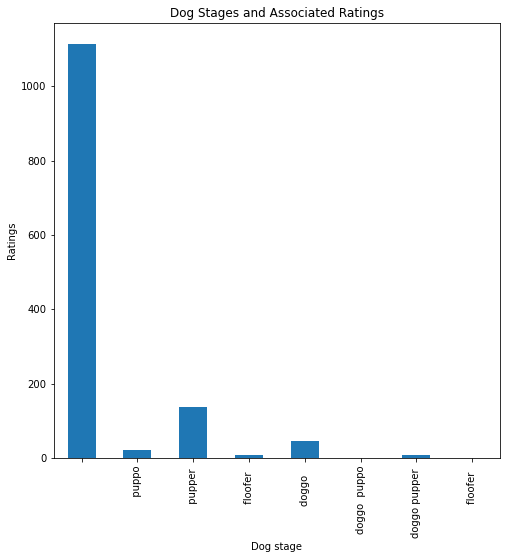

In [198]:
fig=analyze_df.groupby('Dog_stage')['ratings'].sum()
fig.plot(xlabel='Dog stage',ylabel='Ratings',figsize=(8,8), title='Dog Stages and Associated Ratings',kind='bar');